# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/baileycarlson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])


In [3]:
# Create a newsapi client
# YOUR CODE HERE!



In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoinarticles = newsapi.get_everything(
    q = "Bitcoin AND 2021",
    language = "en"
    )

bitcoinarticles["totalResults"]

3217

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereumarticles = newsapi.get_everything(
    q="Ethereum AND 2021",
    language = "en")
ethereumarticles["totalResults"]

1164

In [6]:
#Function to create the article databases 
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)


bitcoin_en_df = create_df(bitcoinarticles["articles"], "en")
ethereum_en_df = create_df(ethereumarticles["articles"], "en")




In [7]:
#function for analyzing the sentiment score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  
    if score >= 0.05:
        result = 1
    elif score <= -0.05:  
        result = -1

    return result

# Sentiment scores dictionaries
def sent_score(df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": [],
        "title_sent": [],
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }

# Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    df = df.join(title_sentiment_df).join(text_sentiment_df)
    return df



In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_en_df = sent_score(bitcoin_en_df)

In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_en_df = sent_score(ethereum_en_df)

In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.128345,0.109750,0.859350,0.030900,0.300000,-0.026125,0.030050,0.932000,0.037950,-0.050000
std,0.259982,0.138717,0.167309,0.075504,0.656947,0.391630,0.049016,0.093386,0.076906,0.686333
min,-0.318200,0.000000,0.458000,0.000000,-1.000000,-0.812600,0.000000,0.714000,0.000000,-1.000000
25%,0.000000,0.000000,0.783000,0.000000,0.000000,-0.060275,0.000000,0.869500,0.000000,-0.250000
50%,0.000000,0.000000,0.922500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.301550,0.199500,1.000000,0.000000,1.000000,0.000000,0.053750,1.000000,0.015250,0.000000
max,0.670500,0.379000,1.000000,0.214000,1.000000,0.726400,0.164000,1.000000,0.249000,1.000000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,0.130140,0.092950,0.887250,0.019800,0.450000,0.118565,0.045500,0.933250,0.021250,0.15000
std,0.311121,0.121705,0.137034,0.088548,0.604805,0.360087,0.072496,0.085386,0.046055,0.67082
min,-0.802000,0.000000,0.604000,0.000000,-1.000000,-0.726900,0.000000,0.782000,0.000000,-1.00000
25%,0.000000,0.000000,0.821750,0.000000,0.000000,0.000000,0.000000,0.846500,0.000000,0.00000
50%,0.025800,0.039500,0.915000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.00000
75%,0.270200,0.143500,1.000000,0.000000,1.000000,0.319175,0.124750,1.000000,0.010500,1.00000
max,0.670500,0.379000,1.000000,0.396000,1.000000,0.771700,0.194000,1.000000,0.186000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english')) 
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
   
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens

In [15]:
bitcoin_en_df["tokens"]= bitcoin_en_df["text"].apply(tokenizer)

bitcoin_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.0,0,0.7264,0.164,0.836,0.000,1,"[retail, investor, grew, comfortable, buying, ..."
1,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,en,0.0000,0.000,1.000,0.0,0,0.6240,0.127,0.873,0.000,1,"[get, roundup, techcrunchs, biggest, important..."
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,0.3182,0.247,0.753,0.0,1,-0.6124,0.000,0.857,0.143,-1,"[image, copyrightgetty, imagesthe, gang, behin..."
3,Best Bitcoin and crypto wallets for 2021 - CNET,The safest and most secure places to stash you...,"Prices go up, prices go down -- but Bitcoin is...",2021-07-30,en,0.6369,0.375,0.625,0.0,1,0.0000,0.000,1.000,0.000,0,"[prices, go, price, go, bitcoin, stay, cryptoc..."
4,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.0,1,-0.2411,0.000,0.939,0.061,-1,"[blockchain, infrastructure, startup, heating,..."


In [16]:
# Create a new tokens column for Bitcoin



In [17]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_en_df["tokens"]= ethereum_en_df["text"].apply(tokenizer)
ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.0,1,-0.2411,0.000,0.939,0.061,-1,"[blockchain, infrastructure, startup, heating,..."
1,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.0,0,0.7264,0.164,0.836,0.000,1,"[retail, investor, grew, comfortable, buying, ..."
2,"Upgrades, ESG, DeFi usage to help ether outpac...",The Ethereum platform's potential applications...,Representations of cryptocurrencies Bitcoin an...,2021-08-03,en,0.4019,0.197,0.803,0.0,1,0.0000,0.000,1.000,0.000,0,"[representations, cryptocurrencies, bitcoin, e..."
3,More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...","Ether holders have ""staked"" more than $13 bill...",2021-07-05,en,0.2263,0.091,0.909,0.0,1,0.7717,0.194,0.806,0.000,1,"[ether, holder, staked, billion, worth, crypto..."
4,More than $13 billion worth of ether has been ...,"Users are putting forward ""stakes"" of ether to...",Ether is the cryptocurrency of the ethereum ne...,2021-07-05,en,0.2263,0.091,0.909,0.0,1,0.6249,0.150,0.850,0.000,1,"[ether, cryptocurrency, ethereum, networkphoto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Creating the function that will generate the N-grams and count them 
def bigram_counter(df): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(df)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])




In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
bitcoin_bigram = bigram_counter(ethereum_en_df["text"])
bitcoin_bigram.head()

,bigram,count
0,"(illustration, taken)",7
1,"(taken, june)",6
2,"(char, representations)",5
3,"(cryptocurrency, ethereum)",5
4,"(bitcoin, ethereum)",4


In [21]:
# Generating the Bitcoin N-grams where N = 2 
ethereum_bigram = bigram_counter(bitcoin_en_df["text"])
ethereum_bigram.head()

,bigram,count
0,"(taken, june)",7
1,"(char, representations)",6
2,"(illustration, taken)",6
3,"(july, reuters)",4
4,"(illustration, picture)",4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

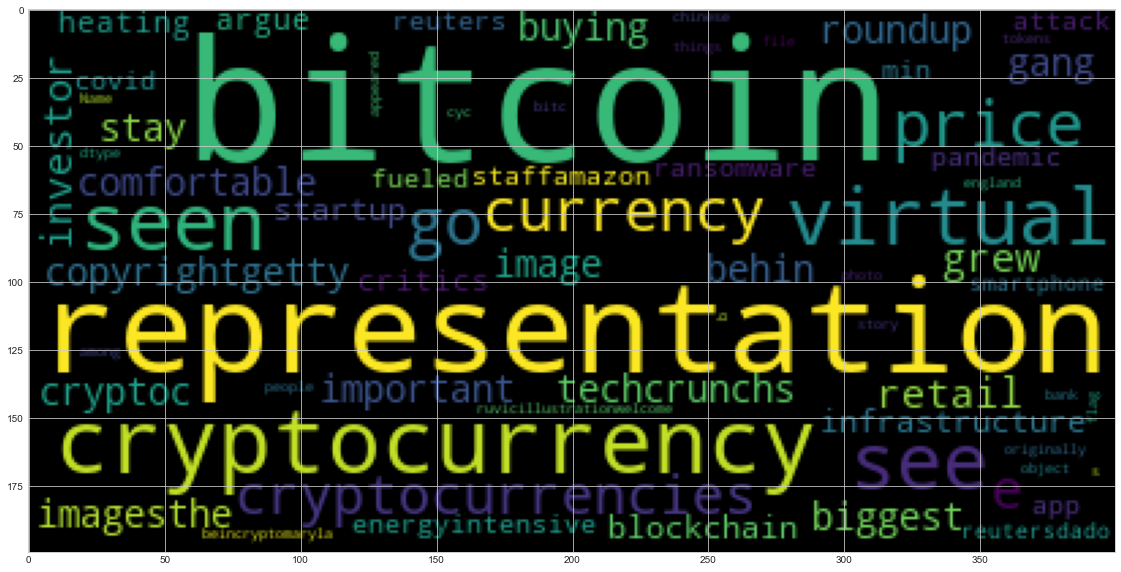

In [23]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bwc = WordCloud().generate(str(bitcoin_en_df["tokens"]))
plt.imshow(bwc)

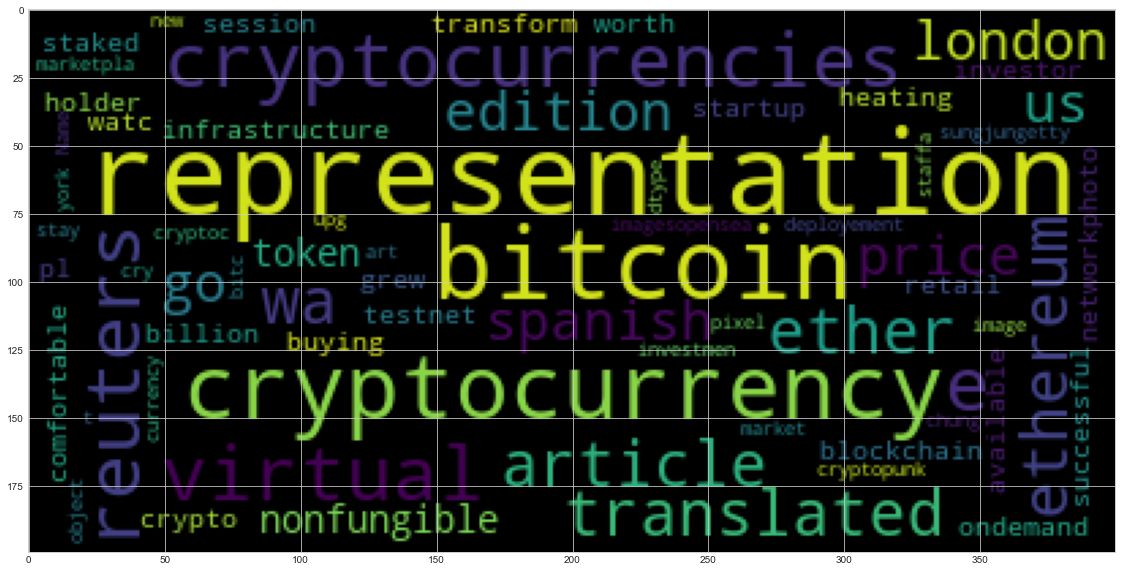

In [24]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ewc = WordCloud().generate(str(ethereum_en_df["tokens"]))
plt.imshow(ewc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

btctext =(bitcoin_en_df['text'].str.cat())

In [29]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btcdoc = nlp(btctext)
# Add a title to the document
# YOUR CODE HERE!


In [30]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btcdoc, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
btcentities = [ent.text for ent in btcdoc.ents if ent.label_ in ['GPE', 'ORG']]
btcentities

['Bitcoin and Ethereum',
 'Daily Crunch',
 '+2468 chars]Critics argue',
 'Getty Images',
 'REUTERS',
 'Dado',
 'Reuters',
 'Tesla Inc',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Dado Ruvic/Illustration',
 'Reuters',
 'Dado Ruvic/Illustration',
 'the Opening Bell',
 'REUTERS',
 'Dado Ruvic/Illustration/File PhotoSAN SALVADOR',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'China',
 'The Bank of England',
 'the City of London',
 'London',
 'Britain',
 'REUTERS',
 'LONDON',
 'Reuters',
 'be[IN]cryptoMaryland',
 'ProFunds']

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethtext = (bitcoin_en_df['text'].str.cat())

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethdoc = nlp(ethtext)

# Add a title to the document
# YOUR CODE HERE!


In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethdoc, style='ent')

In [37]:
# List all Entities
# YOUR CODE HERE!
ethentities = [ent.text for ent in ethdoc.ents if ent.label_ in ['GPE', 'ORG']]
ethentities

['Bitcoin and Ethereum',
 'Daily Crunch',
 '+2468 chars]Critics argue',
 'Getty Images',
 'REUTERS',
 'Dado',
 'Reuters',
 'Tesla Inc',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Dado Ruvic/Illustration',
 'Reuters',
 'Dado Ruvic/Illustration',
 'the Opening Bell',
 'REUTERS',
 'Dado Ruvic/Illustration/File PhotoSAN SALVADOR',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'REUTERS',
 'Reuters',
 'China',
 'The Bank of England',
 'the City of London',
 'London',
 'Britain',
 'REUTERS',
 'LONDON',
 'Reuters',
 'be[IN]cryptoMaryland',
 'ProFunds']

---